### First we need to create and save a model for mask detection which will be used by the face detection computer vision algorithm

### Importing necessary libraries and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf


### Data Mining

The dataset is obtained from Kaggle.
https://www.kaggle.com/datasets/omkargurav/face-mask-dataset

#### Reading the dataset. The dataset is split into two folders, "WithMask" and "WithoutMask".

In [2]:
path1 = r"D:\Mask detection"
CATEGORIES =['WithMask', 'WithoutMask']

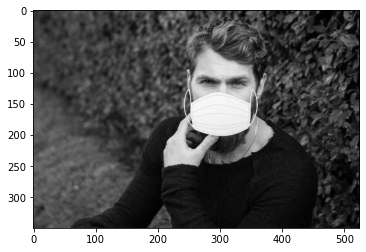

In [3]:
for category in CATEGORIES:
    path = os.path.join(path1,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break     
    

#### Resizing the images, since all images are of different sizes

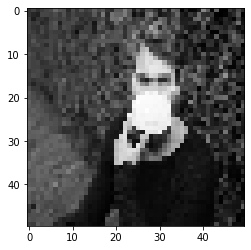

In [4]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

#### Now we need to combine the images so that the algorithm is ready to select the images randomly for training the data.

In [5]:
train_data = []
def create_train_data():
    for category in CATEGORIES:
        path = os.path.join(path1,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                train_data.append([new_array,class_num])
            except Exception as e:
                pass

create_train_data()  

In [6]:
print(len(train_data))

7553


#### We need to shuffle the images randomly to avoid biasness 

In [7]:
import random
random.shuffle(train_data)

#### creating separate variables for features and label

In [8]:
X =[]
Y =[]

In [9]:
for features, label in train_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)    
Y = np.array(Y) 

the data is now stored separately in X and Y variable

#### Sampling of data. Splitting the data into train and test datasets

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size =.2)

X_train =X_train/255
X_test = X_test/255

In [11]:
X_train.shape

(6042, 50, 50, 1)

In [12]:
X_test.shape

(1511, 50, 50, 1)

#### Import the necessary libraries required for building a deep learning model.

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout

from tensorflow.keras.utils import to_categorical 

#### Compiling the model

In [14]:
model = Sequential()

model.add(Conv2D(filters = 14 , kernel_size = (7,7) , activation ='relu' , padding='same'))
model.add(MaxPool2D(pool_size=(2 , 2)))
model.add(Flatten())

model.add(Dense(256 , activation='relu'))
model.add(Dense(2 , activation='softmax'))

model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy' , metrics=['accuracy'])

model1 = model.fit(X_train , Y_train ,epochs = 10)

Epoch 1/10
189/189 [==============================] - 18s 87ms/step - loss: 0.5823 - accuracy: 0.6971
Epoch 2/10
189/189 [==============================] - 17s 87ms/step - loss: 0.4330 - accuracy: 0.7981
Epoch 3/10
189/189 [==============================] - 16s 87ms/step - loss: 0.3315 - accuracy: 0.8514
Epoch 4/10
189/189 [==============================] - 16s 87ms/step - loss: 0.2657 - accuracy: 0.8850
Epoch 5/10
189/189 [==============================] - 17s 88ms/step - loss: 0.2079 - accuracy: 0.9143
Epoch 6/10
189/189 [==============================] - 17s 90ms/step - loss: 0.1624 - accuracy: 0.9351
Epoch 7/10
189/189 [==============================] - 17s 89ms/step - loss: 0.1294 - accuracy: 0.9530
Epoch 8/10
189/189 [==============================] - 17s 88ms/step - loss: 0.0910 - accuracy: 0.9669
Epoch 9/10
189/189 [==============================] - 17s 88ms/step - loss: 0.0548 - accuracy: 0.9834
Epoch 10/10
189/189 [==============================] - 17s 90ms/step - loss: 0.040

#### Predicitve Analysis

In [15]:
pred_values = model.predict(X_test)


pred_classes = np.argmax(pred_values, axis =1)
pred_classes

48/48 [==============================] - 2s 31ms/step


array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

#### Build a confusion matrix to evaluate performance of the model

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test , pred_classes)

array([[596, 149],
       [ 72, 694]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred_classes))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       745
           1       0.82      0.91      0.86       766

    accuracy                           0.85      1511
   macro avg       0.86      0.85      0.85      1511
weighted avg       0.86      0.85      0.85      1511



Overall, from the classification report we can see that all the scores are high, which means our model is suitable for the purpose of predicition.

In [19]:
model.save('mask_detection.h5')

Now, we have saved the model, which will be used in mask detection process with a live camera.